### Apresentação ✒️

Estudo referente ao algoritmo K-Means. K-Means é um algoritmo de aprendizado não supervisionado, baseado no uso de centroides para a compreensão dos clusters presentes num dataset. Um cluster pode ser compreendido como datapoints que apresentam similaridade entre si, formando um grupo particular, de tal modo que tal semelhança se dá em decorrência da menor distância entre si verificada no espaço n-dimensional. 

Nesse sentido, datapoints próximos são tidos como similares enquanto datapoints distantes como não similares. Para servir de métrica de compreensão da distância, existe uma série de distâncias que podem ser utilizadas, cada qual relacionadas ao seu contexto particular de uso, podendo destacar :

* Euclidiana : 

A distância mais comum de todas a ser utilizada. Comumente é aplicada quando dispõe-se de clusters em formatos esféricos e quando os dados das features apresentam de modo mais prevalente valores contínuos. 

Um ponto de atenção é que tal métrica, por ser baseada em magnitude, é sensível a casos de alta dimensionalidade no dataset ( curse of dimensionality ), uma vez que em elevada dimensão as diferenças, tanto em termos máximos quanto mínimos, se torna difícil de serem detectadas pelo modelo. 

* Manhattan : 

Mensura as diferenças absolutas entre as coordenadas e os pontos, sendo boa para cenários nos quais os dados apresentam características esparsas (muito zeros). 

Ao contrário da distância euclidiana, forma clusters que apresentam uma forma mais retangular e é menos sensivel a outliers, uma vez que não amplifica desvios que são elevados ao quadrado. 

* Minkowski : 

Generalização da distância de Manhattan e Euclidiana, podendo se ajustar por meio do parâmetro $p$, que modela a equação para ser uma ou outra.

* Cosseno : 

A distância concebida por meio dessa métrica se dá na concepção de que termos semelhantes apresentam um menor ângulo entre si. Ao contrário das outras métricas, não compreende a distância por meio da magnitude, mas do ângulo formado, sendo ideal para dados vetoriais como texto ou dados esparsos. Funciona bem para dados com alta dimensionalidade. Em contrapartida, exige maior complexidade computacional. 

#### Library 📚

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import DataFrame

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import SilhouetteVisualizer

#### Gerando o Dataset

In [16]:
X, y = make_blobs(
    n_samples    = 2500, 
    n_features   = 5, 
    centers      = 5, 
    cluster_std  = 0.8, 
    random_state = 42
)

In [17]:
X.shape

(2500, 5)

In [51]:
print(f"Tipo de dado de X: {X.dtype}\nTipo de dado de y: {y.dtype}")

Tipo de dado de X: float64
Tipo de dado de y: int64


In [18]:
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])

df["label"] = y

# Salvando o dataframe criado em formato csv. 
df.to_csv("df.csv")

In [19]:
# Renomeando as features :
df.rename(columns={
    "feature_0": "distance_center",
    "feature_1": "num_rooms",
    "feature_2": "property_size",
    "feature_3": "age",
    "feature_4": "utility_cost"}, 
    inplace=True
)

In [20]:
df.head()

,distance_center,num_rooms,property_size,age,utility_cost,label
0,-6.065960,-8.222127,7.843015,2.671263,4.032207,1
1,-8.732379,9.982424,6.841653,-5.720766,-6.637669,2
2,-6.168786,-3.464883,0.376451,-2.764938,-3.367362,3
3,-11.059331,8.746422,7.506425,-6.327649,-6.452693,2
4,-6.598562,-4.239396,0.884697,-1.885424,-4.022911,3


#### Explorando os dados

In [21]:
df.isnull().sum()

distance_center    0
num_rooms          0
property_size      0
age                0
utility_cost       0
label              0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(0)

Criando um dicionário que conterá os itens a serem passados nas funções que realizam a criação dos gráficos de exploração dos dados. 


In [56]:
parameters = {
    "dataset": df,
    "style": "whitegrid", 
    "color": "coolwarm", 
    "height": 12, 
    "width": 6,
    "bins": 35
}

k_means_parameters = {
    "random_state": 42, 
    "max_iter": 300
}

Criando uma função que gera boxplots com o objetivo de auxiliar na visualização da presença de outliers nos dados.

In [ ]:
def boxplot(
        dataset: DataFrame, 
        style : str, 
        height : int, 
        width : int
    ):
    """
    Generates a series of boxplots for each feature in the given dataset.

    This function visualizes the distribution and identifies potential outliers 
    for each feature in the provided dataset using boxplots. It automatically 
    creates subplots for up to six features per figure.

    Parameters:
    ----------
    dataset : DataFrame
        A pandas DataFrame containing the dataset to be visualized. 
        Each column in the dataset represents a feature whose distribution will 
        be displayed as a boxplot.

    style : str
        The style theme for the seaborn visualization. This can be one of 
        seaborn's predefined themes, such as 'darkgrid', 'whitegrid', 'dark', 
        'white', or 'ticks'. It controls the overall appearance of the plots.

    height : int
        The height of the figure in inches. This value determines the vertical 
        size of the overall plot.

    width : int
        The width of the figure in inches. This value determines the horizontal 
        size of the overall plot.

    Returns:
    -------
    None
        This function does not return any value. It directly generates and 
        displays the plots using matplotlib.

    Notes:
    ------
    - The function assumes the dataset has up to six features to visualize. If 
      the dataset contains more than six features, only the first six will be 
      displayed.
    - Subplots are arranged in a 2x3 grid layout. If there are fewer than six 
      features, the remaining subplots will be empty.
    - Ensure that the 'sns' (seaborn) and 'plt' (matplotlib.pyplot) libraries 
      are imported before calling this function.
    - The 'style' parameter should be a valid seaborn theme name; otherwise, 
      the function may raise an error.
    - Currently, the function has a minor issue where the variable 'df' is 
      referenced instead of the passed 'dataset'. This needs to be corrected 
      for the function to work as intended.
    """

    sns.set_theme(style=style)
    
    feature = dataset.columns
    plt.figure(figsize=(height, width))

    for i, feature in enumerate(feature, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(data=df[feature])
        plt.title(f"Boxplot de {feature}")
    
    plt.tight_layout()
    plt.show()

Visualizando a presença de outliers por meio da função criada.

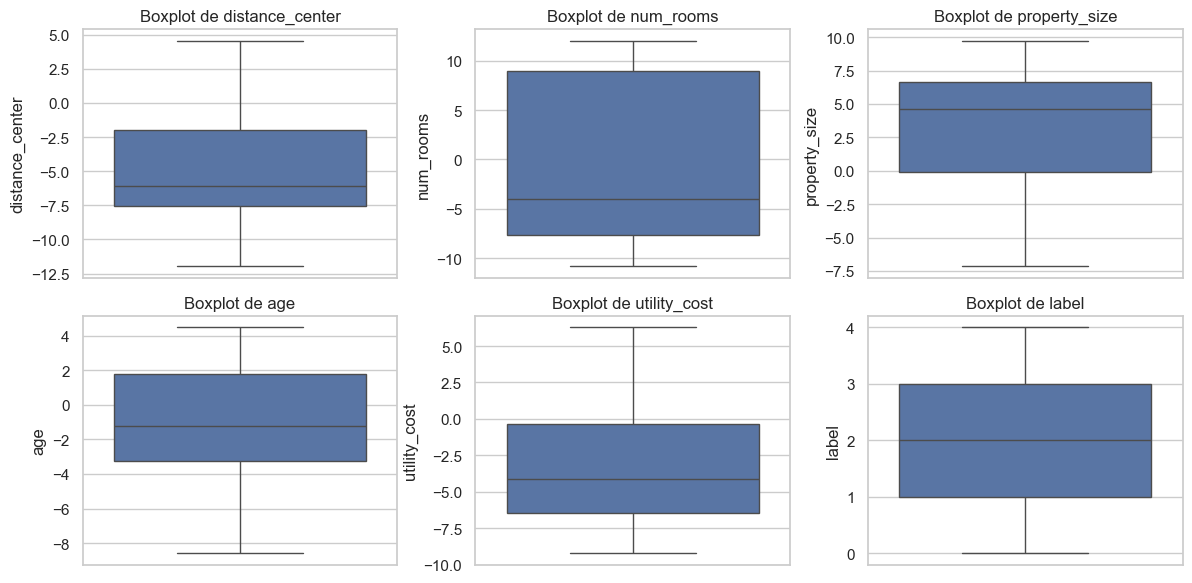

In [35]:
boxplot(dataset = df, 
        style   = parameters["style"], 
        height  = parameters["height"], 
        width   = parameters["width"])

Criando uma função que auxilia a compreender a distribuição dos dados. 

In [41]:
def data_distribuition(
        dataset: DataFrame, 
        style : str, 
        height: int, 
        width: int, 
        bins: int
        ):
    """ 
    Visualizes the distribution of each feature in the dataset using histograms.

    Parameters:
    ----------
    dataset : DataFrame
        The dataset to be visualized, where each column represents a feature.
    
    style : str
        Seaborn theme for plot styling (e.g., 'darkgrid', 'whitegrid').
    
    height : int
        The height of the figure in inches.
    
    width : int
        The width of the figure in inches.
    
    bins : int
        Number of bins for the histograms.
    """
    feature = dataset.columns
    sns.set_theme(style=style)

    # Determinar o número de linhas no grid :
    
    # Fixo para 3 colunas
    n_cols = 3 

    # Calcular o número de linhas necessárias
    n_rows = (len(feature) + n_cols - 1) // n_cols  

    plt.figure(figsize=(height, width))

    for i, feature in enumerate(feature, 1):

        data = dataset[feature]

        plt.subplot(n_rows, n_cols, i)
        sns.histplot(data, kde=True, bins=bins)
        plt.title(f"Histograma de {feature}")


    plt.tight_layout()
    plt.show()

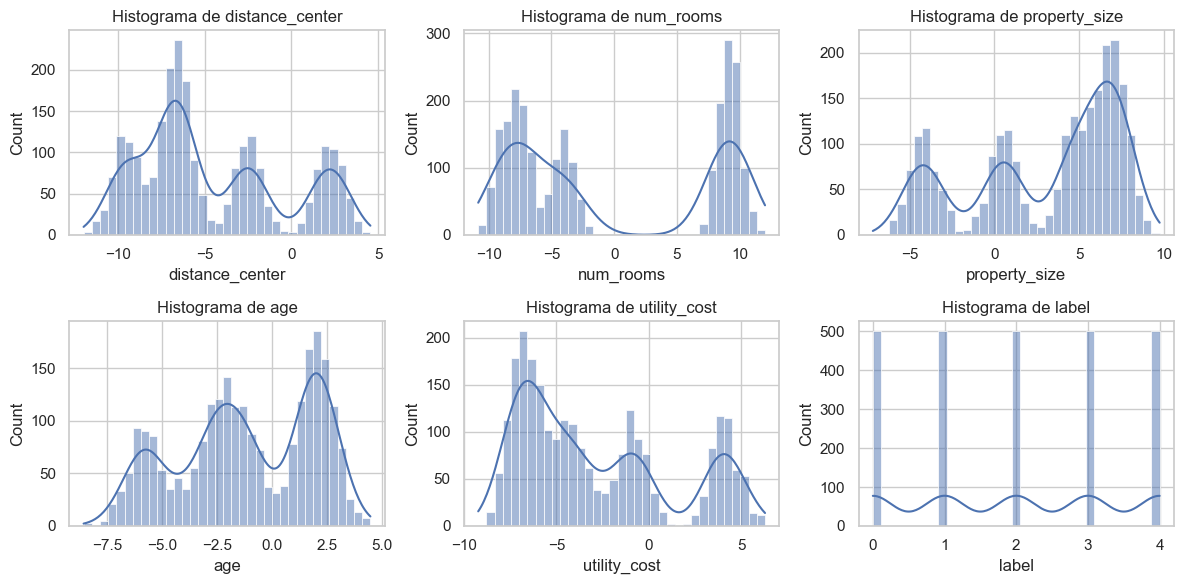

In [42]:
data_distribuition(
    dataset = parameters["dataset"], 
    style   = parameters["style"], 
    height  = parameters["height"], 
    width   = parameters["width"], 
    bins    = parameters["bins"]
)

Verificando a correlação linear entre as features


In [44]:
def pearson_matrix(
        dataset: DataFrame, 
        color: str, 
        height: int, 
        width: int
    ):
    """ 
    Generates a heatmap to visualize the Pearson correlation matrix of a dataset.

    Parameters:
    ----------
    dataset : DataFrame
        The dataset whose features' correlations will be computed and visualized.
    
    color : str
        The colormap for the heatmap (e.g., 'coolwarm', 'viridis').
    
    height : int
        The height of the heatmap figure in inches.
    
    width : int
        The width of the heatmap figure in inches.
    """
    corr_matrix = dataset.corr()

    plt.figure(figsize=(height, width))
    sns.heatmap(corr_matrix, annot=True, cmap=color, fmt=".2f")

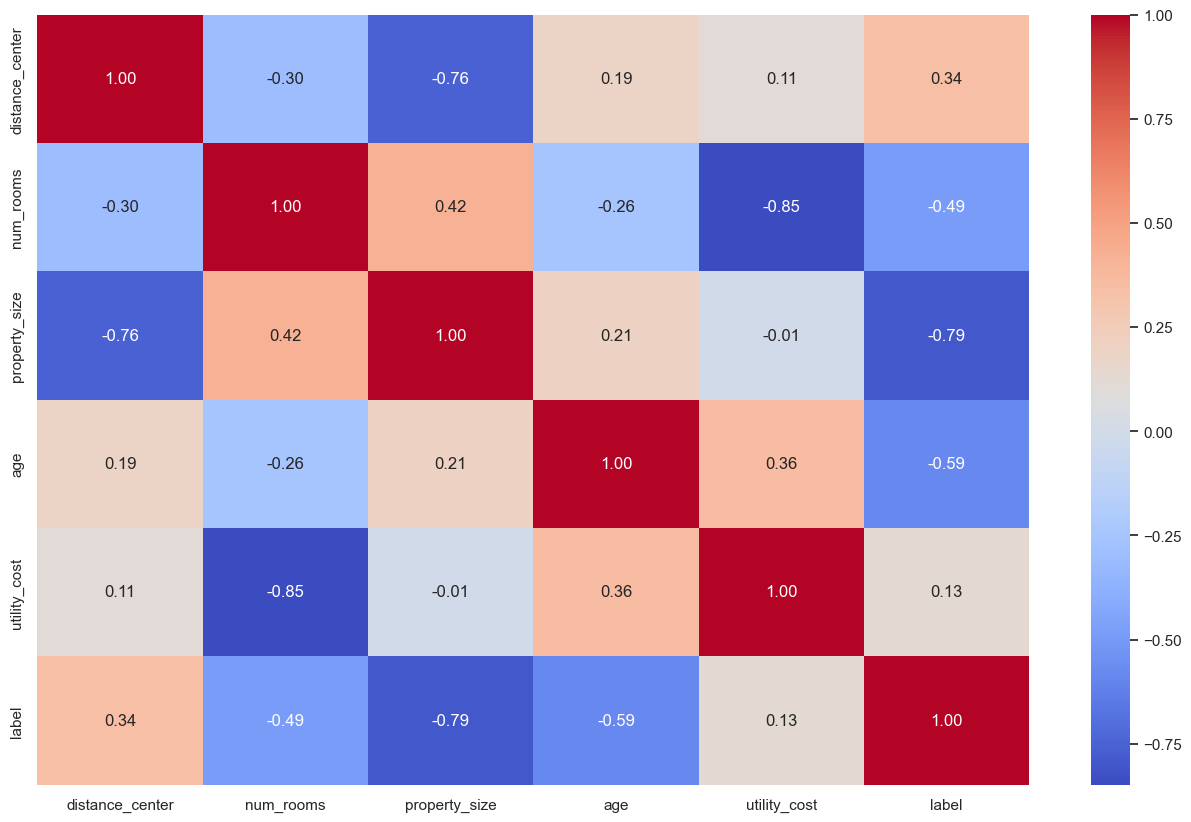

In [48]:
pearson_matrix(
    dataset = df, 
    color   = parameters["color"], 
    height  = 16, 
    width   = 10
)

In [52]:
def visualize_cluster(X: float, y: int, size : int):
    """
    Function that build a cluster graph for cluster's visualization 
    """
    # Noting the labels for each points
    unique_labels = set(y)

    # Building the graph with the labels. 
    for label in unique_labels:
        plt.scatter(X[y==label][:, 0], X[y==label][:, 1], s = size, label = f"Cluster {label}")

    plt.legend(loc="upper right")

    plt.show()

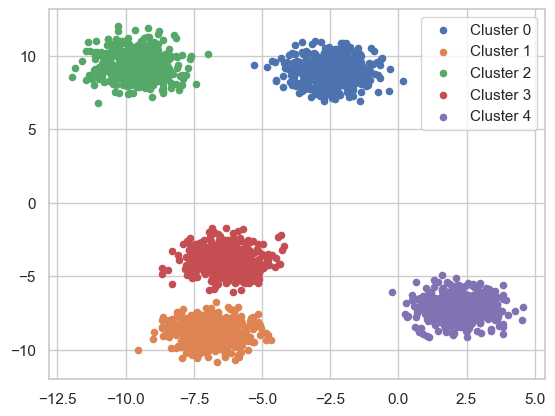

In [53]:
visualize_cluster(
    X    = X, 
    y    = y,
    size = 20
)

Verificando o gráfico acima, nota-se que pode ser compreendido 5 clusters bem definidos. A príncipio poderíamos simplesmente adotar o número de clusters para ser passado para o K-Means, contudo nem sempre esse será o cenário, sendo necessário utilizar uma abordagem mais robusta, que se traduz na integração com o método elbow e silhueta, que auxilia na compreensão da quantidade de cluster e no monitoramento da qualidade dos clusters formados. 

Importante compreender que como o K-Means é sensível a escala e, compreendendo que os dados estão em escala diferentes, será necessário realizar um escalonamento dos dados presentes. Não obstante, dado que o dataset não apresenta elevada dimensionalidade e que os clusters - vistos no gráfico acima - formam figuras esféricas bem definidas a distância Euclidiana servirá bem para a clusterização dos dados. 

Observação : 

A dimensionalidade do dataset utilizado, bem como as features presentes, influem na métrica de distância utilizada pelo K-Means tendo em vista que essa se relaciona ao contexto dos dados no qual o algoritmo poderá ser utilizado. Nesse sentido, se estou diante de um cenário de elevada dimensionalidade, o uso de distância que não seja a do cosseno pode apresentar dificuldade, dado que perde-se a compreensão das diferenças - tanto máximas quanto mínimas -. Como a distância compreendida pelo cosseno não é compreendida em termos de magnitude, mas angular, a compreensão dos clusters não fica prejudicada. 


In [57]:
scaler = StandardScaler()

X_scaled = df.values
normalized_values = scaler.fit_transform(X_scaled)

In [59]:
normalized_values[:5]

array([[-0.34597695, -0.99511212,  1.11393804,  1.24558531,  1.65588462,
        -0.70710678],
       [-0.98539692,  1.29434822,  0.88448664, -1.48464631, -0.90548693,
         0.        ],
       [-0.37063489, -0.39682646, -0.59694584, -0.52300813, -0.12042891,
         0.70710678],
       [-1.54341114,  1.13890486,  1.03681212, -1.68208727, -0.8610823 ,
         0.        ],
       [-0.47369729, -0.49423158, -0.4804866 , -0.23687048, -0.27779764,
         0.70710678]])

In [60]:
def elbow_graph(data):

    wc_sum = []

    for i in range(1, 11): 
        kmeans = KMeans(
            n_clusters   = i, 
            init         = "k-means++", 
            max_iter     = k_means_parameters["max_iter"], 
            n_init       = 10, 
            random_state = k_means_parameters["random_state"]
        )
        kmeans.fit(data)
        wc_sum.append(kmeans.inertia_)

    plt.plot(range(1, 11), wc_sum)
    plt.title("Elbow Method")
    plt.xlabel("Number of clusters")
    plt.ylabel("Within Clusters Sum")
    plt.show()

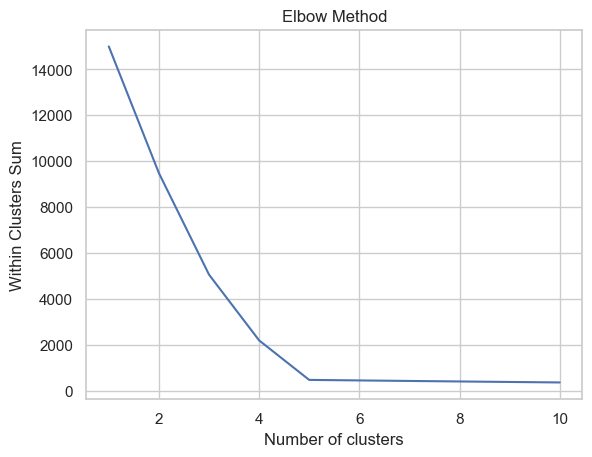

CPU times: total: 281 ms
Wall time: 506 ms


In [62]:
%%time
elbow_graph(
    data=normalized_values
)

Assim como pode ser verificado no gráfico dos clusters, o gráfico Elbow sugere que a quantidade recomendada de clusters seria de 5, evidenciado pelo ponto de inflexão a partir do qual o descrescimento da curva deixa de ser protuberante como antes. 

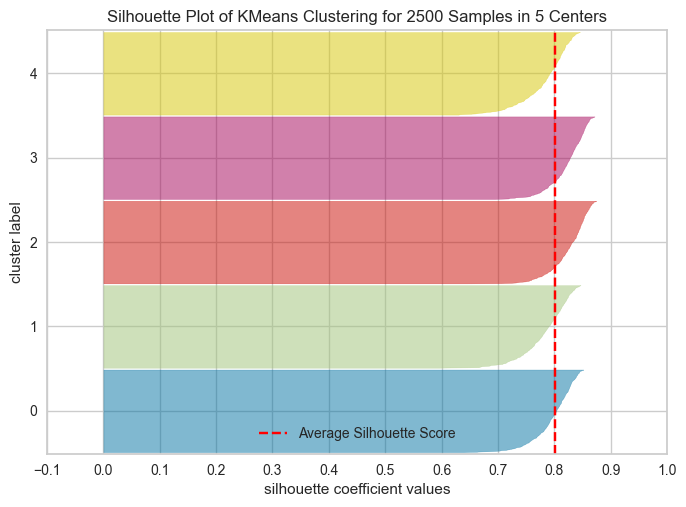

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2500 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [64]:
# Creating the K-Means model with number cluster found
# using Elbow method.

model = KMeans(
    n_clusters   = 5, 
    init         = "k-means++", 
    max_iter     = k_means_parameters["max_iter"], 
    n_init       = 10, 
    random_state = k_means_parameters["random_state"]
)


# Buiding silhoutte graph for view the cluster's quality. 

silhoutte_view = SilhouetteVisualizer(model, colors="yellowbrick")
silhoutte_view.fit(normalized_values)
silhoutte_view.show()

In [ ]:
# Verify the quality of clusters builded with silhoutte score. 

silhoutte = metrics.silhouette_score(
    normalized_values, 
    model.labels_, 
    metric="euclidean"
)

print(f"A silhueta do modelo é de aproximadamente {silhoutte.round(3)}")

A silhueta do modelo é de aproximadamente 0.802


A métrica de silhueta utilizada acima serve como meio para aferir a qualidade do modelo de clusterização utilizado. Ela compreende a qualidade em termos de um intervalo que varia do -1 ao 1, sendo que o último indica perfeito agrupamento enquanto que o segundo denota que o agrupamento realizado não está procedendo ao passo que os clusters compreendidos estão se sobrepondo um no outro. Se o índice estiver em 0, indica que os clusters estão na fronteira de se sobreporem em relação a si. 

Para tanto, compreende para a sua formação o a diferença do nível de separação pela coesão dos clusters, sobre a quantidade máxima deles :

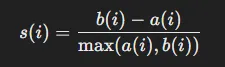

Uma das vantagens dessa métrica é que ela permite a compreensão da qualidade dos clusters tanto em termos numéricos quanto visuais. 

In [68]:
# Verify the quality of clusters builded with Davis Bouldin.

davis_bouldin = metrics.davies_bouldin_score(
    normalized_values, 
    model.labels_
) 

print(f"Índice Davis Bouldin do modelo : {davis_bouldin.round(3)}")

Índice Davis Bouldin do modelo : 0.282


O índice Davis Bouldin também pode ser utilizado para aferir a qualidade dos clusters formados pelo modelo de clusterização utilizado. A sua principal diferença em relação à silhueta é que ele considera os centroides para a realização de seu cálculo para a compreensão do nível de coesão e separação dos clusters, na forma em que a coesão é entendida em termos da dispersão dos dados - com base na distância média - em relação ao centroide do cluster, enquanto a separação é compreendida em termos da distância entre os clusters. 

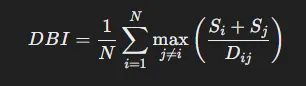

Para a interpretabilidade da métrica, tem-se que valores diminutos - próximos de zero - representam boa qualidade dos clusters formados, enquanto valores elevados - próximos de um - indicam o oposto. 